In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cardio_train.csv to cardio_train.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import io
import pickle

In [ ]:
cardio_data = pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']))
cardio_data = cardio_data.drop(columns="id")

In [ ]:
cardio_data = cardio_data.sample(frac=1).reset_index(drop=True) #shuffling data

In [ ]:
columns = ["age", "height", "weight", "ap_hi", "ap_lo"]         #standardising data
def standartization(data):
    data_std = data.copy(deep=True)
    for column in columns:
        data_std[column]=preprocessing.scale(data_std[column])
    return data_std 
data_std=standartization(cardio_data)
data_std

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436058,2,0.443449,-0.847867,-0.122181,-0.088238,1,1,0,0,1,0
1,0.307684,1,-1.018161,0.749826,0.072610,-0.035180,3,1,0,0,1,1
2,-0.247995,1,0.078046,-0.708937,0.007679,-0.141296,3,1,0,0,0,1
3,-0.748147,2,0.565250,0.541431,0.137540,0.017878,1,1,0,0,1,1
4,-0.808538,1,-1.018161,-1.264657,-0.187111,-0.194354,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,-0.092761,2,0.443449,0.124642,-0.057251,-0.088238,1,1,1,0,1,0
69996,1.269483,1,-0.774559,3.597887,0.072610,-0.035180,2,2,0,0,1,1
69997,-0.163285,2,2.270461,2.139124,0.332331,-0.035180,3,1,0,1,0,1
69998,1.200580,1,-0.165555,-0.153218,0.040145,-0.088238,1,2,0,0,0,1


In [ ]:
data_melted = pd.melt(frame=data_std, id_vars="cardio", value_vars=columns, var_name="features", value_name="value", col_level=None)
data_melted

,cardio,features,value
0,0,age,-0.270692
1,0,age,0.425629
2,1,age,-0.168960
3,1,age,0.706103
4,0,age,-0.973093
...,...,...,...
349995,0,ap_lo,-0.141296
349996,0,ap_lo,-0.194354
349997,0,ap_lo,-0.088238
349998,1,ap_lo,-0.088238


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

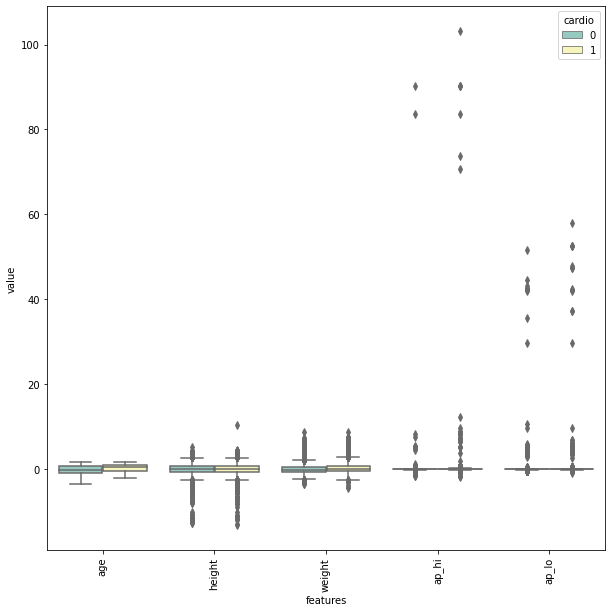

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="cardio",palette='Set3', data=data_melted)
plt.xticks(rotation=90)

In [ ]:
ap_list = ["ap_hi", "ap_lo"]
boundary = pd.DataFrame(index=["lower_bound","upper_bound"]) # finding lower and upper bounds
for each in ap_list:
    Q1 = cardio_data[each].quantile(0.25)
    Q3 = cardio_data[each].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1- 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    boundary[each] = [lower_bound, upper_bound ]
boundary

,ap_hi,ap_lo
lower_bound,90.0,65.0
upper_bound,170.0,105.0


In [ ]:
out_filter = ((cardio_data["ap_hi"]>250) | (cardio_data["ap_lo"]>200) )
print("There are {} outliers".format(cardio_data[out_filter]["cardio"].count())) #finding and removing outliers
cardio_data = cardio_data[~out_filter]

There are 0 outliers


In [ ]:
X = cardio_data.drop(columns='cardio')
y = cardio_data['cardio']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.1)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
path="/content/gdrive/MyDrive/DE Project"
pickle.dump(X_train1, open('X train1.pkl', 'wb'))
pickle.dump(y_train1, open('y train1.pkl', 'wb'))
pickle.dump(X_test1, open('X test1.pkl', 'wb'))
pickle.dump(y_test1, open('y test1.pkl', 'wb'))

pickle.dump(X_train2, open('X train2.pkl', 'wb'))
pickle.dump(y_train2, open('y train2.pkl', 'wb'))
pickle.dump(X_test2, open('X test2.pkl', 'wb'))
pickle.dump(y_test2, open('y test2.pkl', 'wb'))

pickle.dump(X_train3, open('X train3.pkl', 'wb'))
pickle.dump(y_train3, open('y train3.pkl', 'wb'))
pickle.dump(X_test3, open('X test3.pkl', 'wb'))
pickle.dump(y_test3, open('y test3.pkl', 'wb'))

pickle.dump(X_train4, open('X train4.pkl', 'wb'))
pickle.dump(y_train4, open('y train4.pkl', 'wb'))
pickle.dump(X_test4, open('X test4.pkl', 'wb'))
pickle.dump(y_test4, open('y test4.pkl', 'wb'))

pickle.dump(X, open('X.pkl','wb'))
pickle.dump(y, open('y.pkl','wb'))